In [27]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


#the accuracy measures
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [6]:
dataset = pd.read_csv("hepatitis_new_2.csv")
dataset = dataset.drop(["Unnamed: 0"], axis = 1)
dataset.head()

,age,sex,malaise,anorexia,liver_big,liver_firm,ascites,histology,Y
0,30,2,2,2,1,2,2,1,2
1,30,2,2,2,1,2,2,1,2
2,30,2,2,2,1,2,2,1,2
3,30,2,2,2,1,2,2,1,2
4,30,2,2,2,2,2,2,1,2


In [7]:
dataset.shape

(1160, 9)

In [8]:
#split the dataset into the recommended settings
y = dataset['Y']
X = dataset.drop(["Y"] , axis = 1)
X.shape, y.shape

((1160, 8), (1160,))

In [10]:
y.value_counts()

1    602
2    558
Name: Y, dtype: int64

In [14]:
#split to train test and split and then test a machine learning algorithm
#splitting the data into training and test parts
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=7,test_size=0.2)

#scaling
scaler=MinMaxScaler()
sc_x=scaler.fit(x_train)
x_train_scaled=sc_x.transform(x_train.values)
x_test_scaled=sc_x.transform(x_test.values)

In [16]:
y_train.value_counts()

1    476
2    452
Name: Y, dtype: int64

In [17]:
y_test.value_counts()

1    126
2    106
Name: Y, dtype: int64

In [15]:
#Randomforest
rclassifier1=RandomForestClassifier()
rclassifier2=RandomForestClassifier()
rclassifier1.fit(x_train,y_train)
y_preds=rclassifier1.predict(x_test)
rclassifier2.fit(x_train_scaled,y_train)
y_preds1=rclassifier1.predict(x_test_scaled)
print('The accuracy score for Random Forest Unscaled is', accuracy_score(y_test,y_preds))
print('The accuracy score for Random Forest scaled is', accuracy_score(y_test,y_preds1))

The accuracy score for Random Forest Unscaled is 0.978448275862069
The accuracy score for Random Forest scaled is 0.5431034482758621


## In this case the algorithm on Unscaled data producecd 97.8% accuracy on unseen test data

## Also the algorithm on scaled data produced 54.3% accuracy 

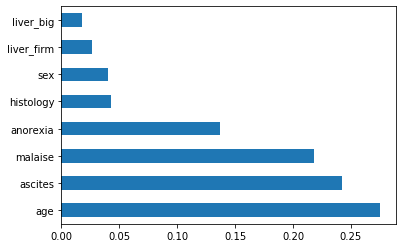

In [19]:
# Time to begin plotting the feature importances
#This graph shows the most important features to consider
feat_importances = pd.Series(rclassifier1.feature_importances_, X.columns)
feat_importances.nlargest(8).plot(kind='barh')

In [21]:
#Discovering the params
rclassifier1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
#plot the 10th leaf
# Extract the small tree
# The tree diagram is in the small_tree.png
import pydot
tree_small = rclassifier1.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [29]:
#the algorithm is stored in hepatitis_random_forest.pkl
file_name = "hepatitis_random_forest.pkl"
with open(file_name, 'wb') as file:
    pickle.dump(rclassifier1, file)

In [35]:
#code to serialize the algorithm from disk and use it 
with open(r"hepatitis_random_forest.pkl", "rb") as input_file:
    rclassifier = pickle.load(input_file)
rclassifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>